<a href="https://colab.research.google.com/github/dineshjagai/internships-2020-summer/blob/master/Analysis_of_the_QuickSilver_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data* Analysis between final merged team and Phillip model's prediction (06.26.2020)

**Libraries**

In [4]:
# Relevant Standard Processing Libraries
import math
import re
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
from IPython.display import Image
import glob
import seaborn as sns
import re
import os

In [ ]:
# Load any important libraries
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# 0) Load the Data
- Insert the .csv files for the master file
- These files can cleaned or not clean

In [6]:
# Load the Relevant Files for the master team and Phillip's model
# File 1 - Consolidated Master File,
# File 2 - Phillip's model output on the test set 
from google.colab import files
uploaded = files.upload()

Saving data_check_dj.csv to data_check_dj.csv
Saving MergedMasterFINAL_616_VINEET + CHIRAG.xlsx to MergedMasterFINAL_616_VINEET + CHIRAG.xlsx


In [ ]:
test_set_ratio = 0.30;  # Update this based on the test set size
MAX_ENTRIES_CURRENT = np.round(test_set_ratio * 25617); # Update this based on the amount of entries generated 

In [8]:
master_file = pd.read_excel("/content/MergedMasterFINAL_616_VINEET + CHIRAG.xlsx", header=0);
phillip_model_output = pd.read_csv("/content/data_check_dj.csv", header=0);
# Shape of the dataframes
print(master_file.shape)
print(phillip_model_output.shape)

(25019, 29)
(7505, 7)


In [9]:
# Number of repeated ID's in the master file 
# TODO - talk to Phillip about this
print('Number of repeated IDs in the master file = %s' %  (master_file.shape[0] - len(master_file.pivot_table(index=['unique_id'], aggfunc='size'))))
print('Number of repeated IDs in the Phillips model  = %s' %  (phillip_model_output.shape[0] - len(phillip_model_output.pivot_table(index=['UID'], aggfunc='size'))))

Number of repeated IDs in the master file = 7
Number of repeated IDs in the Phillips model  = 1


# 1) Merge the Files 
- Inner join on Unique Id


In [10]:
final_uncleaned = pd.merge(left=master_file, right=phillip_model_output, left_on='unique_id', right_on='UID', how='inner');

print(final_uncleaned.shape)
# assert(final_uncleaned.shape[0] == phillip_model_output.shape[0])


(7512, 36)


In [11]:
final_uncleaned.dtypes

unique_id                            object
ID                                   object
Date Sent                            object
Subject                              object
MLS#_x                               object
From                                 object
To                                   object
Offerer Checker From_team_1          object
Offerer Checker To_team_1            object
Offerer Checker From_team_2          object
Offerer Checker To_team_2            object
Buyer Offer                           int64
Counter_team_1                        int64
Counter_team_2                        int64
Human Counter_Team_1                  int64
Human Counter_Team_2                 object
Master Counter                        int64
Message Number                        int64
Scenario                             object
Human Scenario_team_1                object
Human Scenario_team_2                object
Human Keyword Trigger(s)_team_1      object
Human Keyword Trigger(s)_team_2 

# 2) Visualize the Data 

In [12]:
final_uncleaned.head(5)

,unique_id,ID,Date Sent,Subject,MLS#_x,From,To,Offerer Checker From_team_1,Offerer Checker To_team_1,Offerer Checker From_team_2,Offerer Checker To_team_2,Buyer Offer,Counter_team_1,Counter_team_2,Human Counter_Team_1,Human Counter_Team_2,Master Counter,Message Number,Scenario,Human Scenario_team_1,Human Scenario_team_2,Human Keyword Trigger(s)_team_1,Human Keyword Trigger(s)_team_2,Master Scenario,Message_x,Keywords,Keyword Template,Keyword Matching Rate,classification_phillips_vs_teams,Row_number,UID,MLS#_y,Prediction,Correction,Actual,Message_y
0,josh_431,josh_43,11/19/2019 : 21,"OFFER FOR 4015 CASTILE SQUARE, AUSTELL, GA 301...",6635595,B,S,B,S,B,S,196500,0,0,0,0,0,1,Buyer Offer Made,Buyer Offer Made,Buyer Offer Made,I am a sales associate,I am a sales associate,Buyer Offer Made,tycom wrote \ufeff dear leon i am a sales as...,"['closing', ' offer', ' cash', ' costs', ' mls...","['closing', ' offer', ' cash', ' costs', ' mls...",1.0,y,5,josh_431,6635595,Buyer Offer Made,Buyer Offer Made,Buyer Offer Made,tycom wrote \ufeff dear leon i am a sales as...
1,josh_482,josh_48,11/19/2019 : 21,"OFFER FOR 2589 SLOAN STREET, AUSTELL, GA 30106...",6626426,S,B,S,B,S,B,130000,0,0,0,0,0,2,Additional Info,Additional Info,Additional Info,[''],[''],Additional Info,thank you but that property had multiple offer...,"['', ' please', '', '', '', '', '', '', '', '']","['mar', ' please', ' thank', ' know', ' ga', '...",0.1,y,6,josh_482,6626426,Received / Waiting on Client,Received / Waiting on Client,Additional Info,thank you but that property had multiple offer...
2,josh_481,josh_48,11/19/2019 : 21,"OFFER FOR 2589 SLOAN STREET, AUSTELL, GA 30106...",6626426,B,S,B,S,B,S,130000,0,0,0,0,0,1,Buyer Offer Made,Buyer Offer Made,Buyer Offer Made,I am a sales associate,I am a sales associate,Buyer Offer Made,915 pm wrote \ufeff dear shane i am a sales...,"['closing', ' offer', ' cash', ' costs', ' mls...","['closing', ' offer', ' cash', ' costs', ' mls...",1.0,y,7,josh_481,6626426,Buyer Offer Made,Buyer Offer Made,Buyer Offer Made,915 pm wrote \ufeff dear shane i am a sales...
3,josh_522,josh_52,11/19/2019 : 22,"OFFER FOR 933 PINE OAK TRAIL, AUSTELL, GA 3016...",6618131,S,B,S,B,S,B,50500,0,0,55000,55000,55000,2,Received / Waiting on Client,Accept,Counter,client will accept,client will accept,Counter,hello joshuamy client will accept 55k with all...,"['', ' thank', '', '', '', '', ' client', '', ...","['seller', ' thank', ' offer', ' us', ' not', ...",0.2,n,12,josh_522,6618131,Counter,Counter,Counter,hello joshuamy client will accept 55k with all...
4,josh_532,josh_53,11/19/2019 : 23,"OFFER FOR 7110 SILVER MINE CROSSING, AUSTELL, ...",6625152,S,B,S,B,S,B,144000,0,0,0,0,0,2,Reject,Reject,Reject,"not be countering, too far apart",will not be countering,Reject,thank you for your offer joshua however at th...,"['offer', ' not', '', '', ' client', ' time', ...","['offer', ' not', ' seller', ' price', ' clien...",0.4,y,14,josh_532,6625152,Reject,Counter,Reject,thank you for your offer joshua however at th...


In [13]:
# Visualize the uncleaned data 
from pandas_profiling import ProfileReport
report = ProfileReport(final_uncleaned)
report.to_file(output_file='final_uncleaned_file.html')

In [14]:
# Master Team
total = final_uncleaned.shape[0]
print('total = %s' % (total))
print('--------------------------------------------------------')
print(final_uncleaned['Actual'].value_counts())
print('--------------------------------------------------------')
print(final_uncleaned['Actual'].value_counts(normalize=True))

total = 7512
--------------------------------------------------------
Additional Info                 2848
Buyer Offer Made                2030
Counter                          672
Reject                           530
Received / Waiting on Client     487
Under Contract / Pending         460
Sold / Withdrawn                 326
Need PSA                          91
Accept                            37
Wrong Agent                       31
Name: Actual, dtype: int64
--------------------------------------------------------
Additional Info                 0.379127
Buyer Offer Made                0.270234
Counter                         0.089457
Reject                          0.070554
Received / Waiting on Client    0.064830
Under Contract / Pending        0.061235
Sold / Withdrawn                0.043397
Need PSA                        0.012114
Accept                          0.004925
Wrong Agent                     0.004127
Name: Actual, dtype: float64


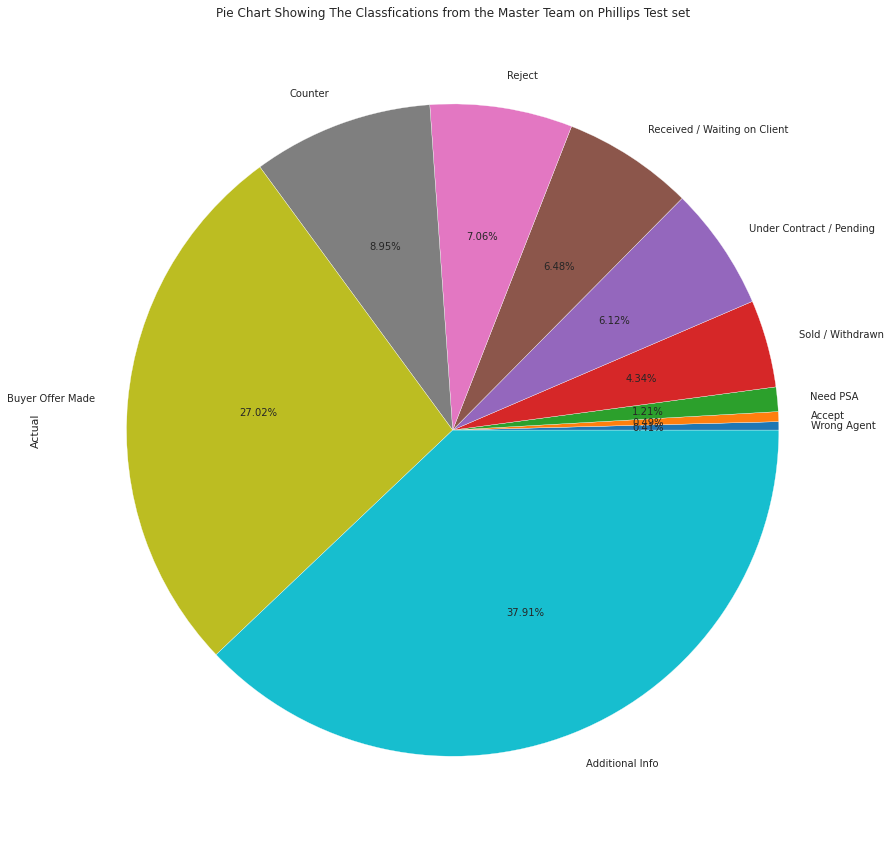

In [15]:
# Scenarios for Master Team 
final_uncleaned['Actual'].value_counts(normalize=True).sort_values().plot(kind = 'pie', figsize=(15,15), fontsize = '10', autopct='%.2f%%', title = 'Pie Chart Showing The Classfications from the Master Team on Phillips Test set');

In [16]:
# Phillip's Model
total = final_uncleaned.shape[0]
print('total = %s' % (total))
print('Classifications for Phillips Model')
print('--------------------------------------------------------')
print(final_uncleaned['Prediction'].value_counts())
print('--------------------------------------------------------')
print(final_uncleaned['Prediction'].value_counts(normalize=True))

total = 7512
Classifications for Phillips Model
--------------------------------------------------------
Additional Info                 3162
Buyer Offer Made                2022
Counter                          577
Reject                           472
Under Contract / Pending         440
Received / Waiting on Client     431
Sold / Withdrawn                 298
Need PSA                          61
Wrong Agent                       30
Accept                            19
Name: Prediction, dtype: int64
--------------------------------------------------------
Additional Info                 0.420927
Buyer Offer Made                0.269169
Counter                         0.076810
Reject                          0.062833
Under Contract / Pending        0.058573
Received / Waiting on Client    0.057375
Sold / Withdrawn                0.039670
Need PSA                        0.008120
Wrong Agent                     0.003994
Accept                          0.002529
Name: Prediction, dtype: fl

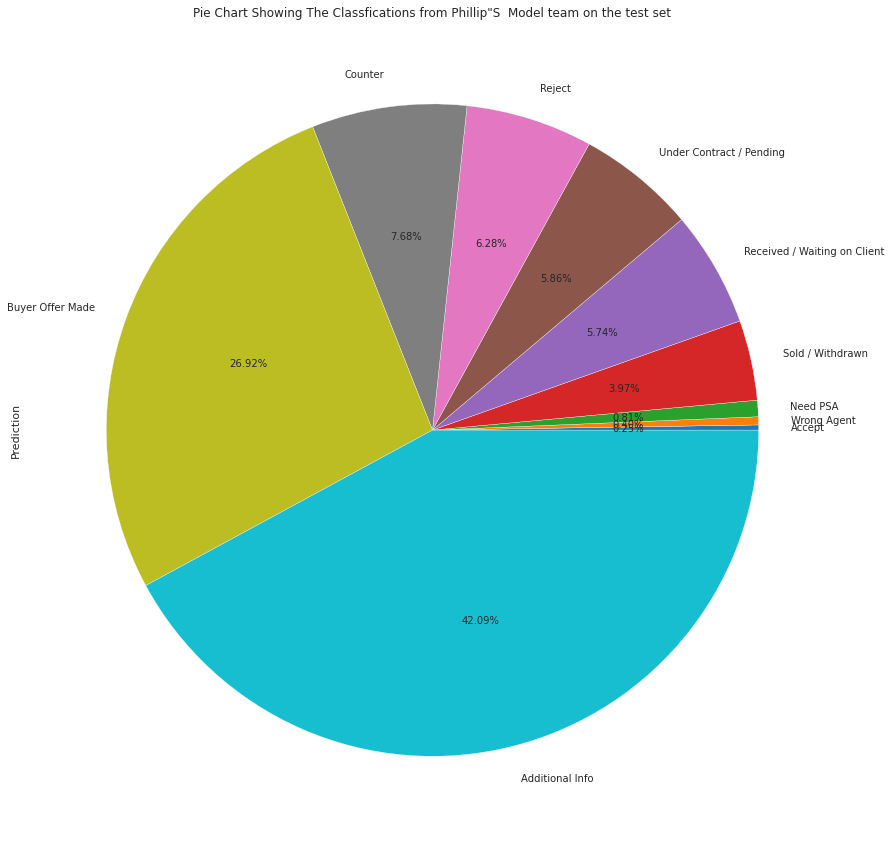

In [17]:
# Scenarios for Philip Team 
final_uncleaned['Prediction'].value_counts(normalize=True).sort_values().plot(kind = 'pie', figsize=(15,15), fontsize = '10', autopct='%.2f%%', title = 'Pie Chart Showing The Classfications from Phillip"S  Model team on the test set');

In [18]:
final_uncleaned.dtypes

unique_id                            object
ID                                   object
Date Sent                            object
Subject                              object
MLS#_x                               object
From                                 object
To                                   object
Offerer Checker From_team_1          object
Offerer Checker To_team_1            object
Offerer Checker From_team_2          object
Offerer Checker To_team_2            object
Buyer Offer                           int64
Counter_team_1                        int64
Counter_team_2                        int64
Human Counter_Team_1                  int64
Human Counter_Team_2                  int64
Master Counter                        int64
Message Number                        int64
Scenario                             object
Human Scenario_team_1                object
Human Scenario_team_2                object
Human Keyword Trigger(s)_team_1      object
Human Keyword Trigger(s)_team_2 

# 3) Clean The Data

In [19]:
# Remove the unnessary Columns 
final_uncleaned = final_uncleaned.drop(['Counter_team_1','Human Counter_Team_1',
                                        'Human Counter_Team_2','Human Scenario_team_1',
                                        'Human Scenario_team_2', 'classification_phillips_vs_teams', 
                                        'Offerer Checker From_team_1',
                                        'Offerer Checker To_team_1','MLS#_x','Message_x','UID','Counter_team_2', 
                                        'Master Scenario', 'Row_number','Correction', 
                                        'Keywords', 'Keyword Template', 'Keyword Matching Rate'], axis=1);

# Fill NaNs in message with empty spaces 
final_uncleaned['Message_y'].fillna("", inplace=True);                    



In [20]:
# Rename Columns to specific the master file
final_uncleaned = final_uncleaned.rename(columns= {'Offerer Checker From_team_2' : 'Offerer Checker From',
                                                           'Offerer Checker To_team_2' : 'Offerer Checker To',
                                                           'MLS#_y' : 'MLS#', 'Message_y' : 'Message','Prediction' : 'Prediction_scenario',
                                                           'Actual' : 'Actual_scenario'});
                                                        

In [21]:
# Reorder the Columns to fit the desired table
final_uncleaned = final_uncleaned[["unique_id", "ID", "Date Sent", "Subject",
                                       "MLS#", "From", "To","Offerer Checker From", 
                                       "Offerer Checker To", "Buyer Offer", 
                                       "Master Counter","Message Number",
                                       "Prediction_scenario","Actual_scenario", 
                                       "Human Keyword Trigger(s)_team_1","Human Keyword Trigger(s)_team_2", 
                                       "Message"]];

In [22]:
# Rename The dataframe
final_cleaned = final_uncleaned; 

In [23]:
final_cleaned.dtypes

unique_id                          object
ID                                 object
Date Sent                          object
Subject                            object
MLS#                               object
From                               object
To                                 object
Offerer Checker From               object
Offerer Checker To                 object
Buyer Offer                         int64
Master Counter                      int64
Message Number                      int64
Prediction_scenario                object
Actual_scenario                    object
Human Keyword Trigger(s)_team_1    object
Human Keyword Trigger(s)_team_2    object
Message                            object
dtype: object

In [24]:
final_cleaned.head(5)

,unique_id,ID,Date Sent,Subject,MLS#,From,To,Offerer Checker From,Offerer Checker To,Buyer Offer,Master Counter,Message Number,Prediction_scenario,Actual_scenario,Human Keyword Trigger(s)_team_1,Human Keyword Trigger(s)_team_2,Message
0,josh_431,josh_43,11/19/2019 : 21,"OFFER FOR 4015 CASTILE SQUARE, AUSTELL, GA 301...",6635595,B,S,B,S,196500,0,1,Buyer Offer Made,Buyer Offer Made,I am a sales associate,I am a sales associate,tycom wrote \ufeff dear leon i am a sales as...
1,josh_482,josh_48,11/19/2019 : 21,"OFFER FOR 2589 SLOAN STREET, AUSTELL, GA 30106...",6626426,S,B,S,B,130000,0,2,Received / Waiting on Client,Additional Info,[''],[''],thank you but that property had multiple offer...
2,josh_481,josh_48,11/19/2019 : 21,"OFFER FOR 2589 SLOAN STREET, AUSTELL, GA 30106...",6626426,B,S,B,S,130000,0,1,Buyer Offer Made,Buyer Offer Made,I am a sales associate,I am a sales associate,915 pm wrote \ufeff dear shane i am a sales...
3,josh_522,josh_52,11/19/2019 : 22,"OFFER FOR 933 PINE OAK TRAIL, AUSTELL, GA 3016...",6618131,S,B,S,B,50500,55000,2,Counter,Counter,client will accept,client will accept,hello joshuamy client will accept 55k with all...
4,josh_532,josh_53,11/19/2019 : 23,"OFFER FOR 7110 SILVER MINE CROSSING, AUSTELL, ...",6625152,S,B,S,B,144000,0,2,Reject,Reject,"not be countering, too far apart",will not be countering,thank you for your offer joshua however at th...


In [25]:
# Visualize the clean data
from pandas_profiling import ProfileReport
report = ProfileReport(final_cleaned)
report.to_file(output_file='final_cleaned_file_test_set_summary.html')

# 4) Analize The Data (Scenario)

In [26]:
print("Final File has %s useful entries out of %s entries " % (final_cleaned.shape[0], MAX_ENTRIES_CURRENT));

Final File has 7512 useful entries out of 7685.0 entries 


In [27]:
# Function that outout 'y when phillip's model is correct and 'n' when it isn't 
def classification_column(p, human_classification):
    if (p == human_classification):
        return 'y';
    else: 
        return 'n';


In [28]:
# Add the classification table for phillips and the master team's model 
final_cleaned['classification_phillips_vs_teams'] = final_cleaned.apply(lambda x : classification_column(x['Prediction_scenario'], x['Actual_scenario']), axis = 1);

## i) Overall view of the similarity of scenarios between Master team and Phillip's 

In [29]:
# Overarching view of master and Phillip's Model
acc_num = np.sum(((final_cleaned['Actual_scenario'] == final_cleaned['Prediction_scenario'])));
acc_master_and_phillip = np.mean(((final_cleaned['Actual_scenario'] == final_cleaned['Prediction_scenario']))); 
# For the given data thus far 
print("Master team and Phillip's model have classified %s out of %s similarly" % (acc_num, final_cleaned.shape[0]));
print("percentage that Master team and Phillip's model have the same classification %6.3f%%" % (acc_master_and_phillip * 100));
print("Master team and Phillip's model have classified %s out of %s differently" % (final_cleaned.shape[0] - acc_num, final_cleaned.shape[0]));
print("percentage that Master team and Phillip's model have the different classification %6.3f%%" % ((1 - acc_master_and_phillip) * 100));

Master team and Phillip's model have classified 6462 out of 7512 similarly
percentage that Master team and Phillip's model have the same classification 86.022%
Master team and Phillip's model have classified 1050 out of 7512 differently
percentage that Master team and Phillip's model have the different classification 13.978%


## ii) In depth view of the similarity of scenarios between Master team and Phillip's

In [30]:
# Classificationwise comparison of Master team and Phillip's Model
master_equals_phillip = final_cleaned.loc[final_cleaned['Actual_scenario'] == final_cleaned['Prediction_scenario']]; 
# Print the percentage values for which they equal 
print("For Phillip's Model and Master team");
print('--------------------------------------------------------')
print(master_equals_phillip['Prediction_scenario'].value_counts());
print('--------------------------------------------------------');
print(master_equals_phillip['Prediction_scenario'].value_counts(normalize=True));

For Phillip's Model and Master team
--------------------------------------------------------
Additional Info                 2594
Buyer Offer Made                2005
Counter                          470
Under Contract / Pending         370
Reject                           350
Received / Waiting on Client     333
Sold / Withdrawn                 258
Need PSA                          48
Accept                            18
Wrong Agent                       16
Name: Prediction_scenario, dtype: int64
--------------------------------------------------------
Additional Info                 0.401424
Buyer Offer Made                0.310275
Counter                         0.072733
Under Contract / Pending        0.057258
Reject                          0.054163
Received / Waiting on Client    0.051532
Sold / Withdrawn                0.039926
Need PSA                        0.007428
Accept                          0.002786
Wrong Agent                     0.002476
Name: Prediction_scenario, dty

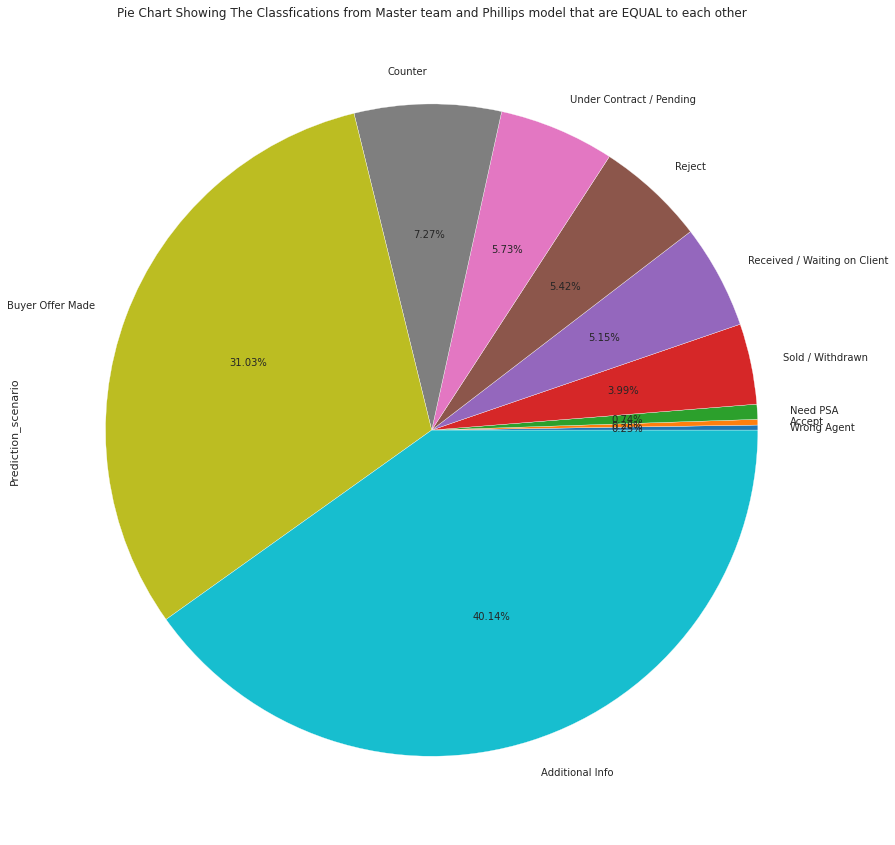

In [31]:
# Pie Chart to summarize the results
master_equals_phillip['Prediction_scenario'].value_counts(normalize=True).sort_values().plot(kind = 'pie', figsize=(15,15), autopct='%.2f%%', 
                                                                                  fontsize = '10', title = 'Pie Chart Showing The Classfications from Master team and Phillips model that are EQUAL to each other');

## iii) In depth view of the differences of scenarios between Master team and Phillip's

In [32]:
# Classificationwise comparison of Master team and Phillip's Model For Values that are not EQUAL 
master_team_not_equals_phillip = final_cleaned.loc[final_cleaned['Actual_scenario'] != final_cleaned['Prediction_scenario']]; 
print('classifications when Master team does not equal Phillips Model');
print('--------------------------------------------------------');
# Print the numerical values for which they equal 
print(master_team_not_equals_phillip['Prediction_scenario'].value_counts());
print('--------------------------------------------------------');
# Print the percentage values for which they equal 
print(master_team_not_equals_phillip['Prediction_scenario'].value_counts(normalize=True));

classifications when Master team does not equal Phillips Model
--------------------------------------------------------
Additional Info                 568
Reject                          122
Counter                         107
Received / Waiting on Client     98
Under Contract / Pending         70
Sold / Withdrawn                 40
Buyer Offer Made                 17
Wrong Agent                      14
Need PSA                         13
Accept                            1
Name: Prediction_scenario, dtype: int64
--------------------------------------------------------
Additional Info                 0.540952
Reject                          0.116190
Counter                         0.101905
Received / Waiting on Client    0.093333
Under Contract / Pending        0.066667
Sold / Withdrawn                0.038095
Buyer Offer Made                0.016190
Wrong Agent                     0.013333
Need PSA                        0.012381
Accept                          0.000952
Name: Predict

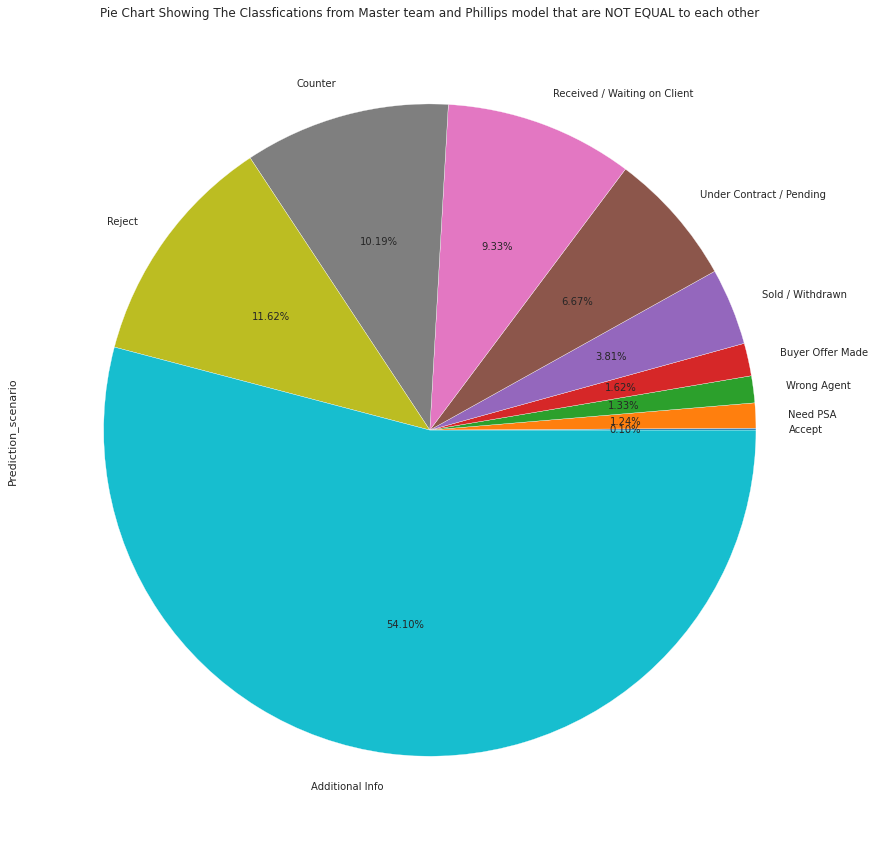

In [33]:
# Piechart to Summarize the results 
master_team_not_equals_phillip['Prediction_scenario'].value_counts(normalize=True).sort_values().plot(kind = 'pie', figsize=(15,15), fontsize = '10',  autopct='%.2f%%',
                                                                                           title = 'Pie Chart Showing The Classfications from Master team and Phillips model that are NOT EQUAL to each other');

In [34]:
# Save file so we can View this in more detail (i.e. we can view the mismatch in Classifications between master and Phillip's Model)
# Export master_team_not_equals_phillip to CSV 
master_team_not_equals_phillip.to_csv(r'master_team_not_equals_phillip.csv', index = False, header=True)
from google.colab import files
files.download("master_team_not_equals_phillip.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## iv)  Accuracy with Phillip Model, assuming that the master model is the ground truth/is correct 

In [35]:
# Create a table that has phillip Corect values with the total number (shows the accuracy of Phillips Model)
df_val_counts_master_equals_phillip = pd.DataFrame(master_equals_phillip['Prediction_scenario'].value_counts(sort=True, ascending=False));
df_val_counts_ground_truth_values = pd.DataFrame(final_uncleaned['Actual_scenario'].value_counts(sort=True));
accuracy_phillip_master_df = pd.merge(left=df_val_counts_master_equals_phillip, right=df_val_counts_ground_truth_values, left_on=df_val_counts_master_equals_phillip.index.values, right_on=df_val_counts_ground_truth_values.index.values, how='inner');
accuracy_phillip_master_df = accuracy_phillip_master_df.rename(columns= {'key_0' : 'Scenario Type',
                                                           'Prediction_scenario' : 'Phillips Model Correct Classification',
                                                           'Actual_scenario' : 'Total Number Of Classification type'});

                                                        



In [36]:
accuracy_phillip_master_df['accuracy'] = accuracy_phillip_master_df.apply(lambda x : (x['Phillips Model Correct Classification'])/x['Total Number Of Classification type'], axis=1);
accuracy_phillip_master_df['delta'] = accuracy_phillip_master_df.apply(lambda x : (x['Total Number Of Classification type'] - x['Phillips Model Correct Classification']), axis=1);
accuracy_phillip_master_df['total'] = accuracy_phillip_master_df.apply(lambda x : (x['Total Number Of Classification type']), axis=1);
# Sort it by accuracy 
accuracy_phillip_master_df = accuracy_phillip_master_df.sort_values('accuracy',ascending=False)

In [37]:
accuracy_phillip_master_df

,Scenario Type,Phillips Model Correct Classification,Total Number Of Classification type,accuracy,delta,total
1,Buyer Offer Made,2005,2030,0.987685,25,2030
0,Additional Info,2594,2848,0.910815,254,2848
3,Under Contract / Pending,370,460,0.804348,90,460
6,Sold / Withdrawn,258,326,0.791411,68,326
2,Counter,470,672,0.699405,202,672
5,Received / Waiting on Client,333,487,0.683778,154,487
4,Reject,350,530,0.660377,180,530
7,Need PSA,48,91,0.527473,43,91
9,Wrong Agent,16,31,0.516129,15,31
8,Accept,18,37,0.486486,19,37


In [38]:

new_row = {'Scenario Type':'TOTAL', 'Phillips Model Correct Classification':master_equals_phillip.shape[0], 'Total Number Of Classification type':final_uncleaned.shape[0], 'accuracy': master_equals_phillip.shape[0]/final_uncleaned.shape[0], 'delta' : final_uncleaned.shape[0] - master_equals_phillip.shape[0], 'total' :final_uncleaned.shape[0]}
accuracy_phillip_master_df = accuracy_phillip_master_df.append(new_row, ignore_index=True)


In [39]:
# Rename the columns to get the right format 
accuracy_phillip_master_df =  accuracy_phillip_master_df.rename(columns= {'Phillips Model Correct Classification' : 'Phillip_6.26.2020',
                                                           'Total Number Of Classification type' : 'Master Combined Legend',
                                                           'delta' : 'Delta', 'total' : 'Total','accuracy' : 'Accuracy'});



In [40]:
# Reorder the Columns to fit the initial table
accuracy_phillip_master_df = accuracy_phillip_master_df[["Scenario Type", "Total", "Phillip_6.26.2020",
                                       "Master Combined Legend", "Delta", "Accuracy"]];

In [41]:
accuracy_phillip_master_df

,Scenario Type,Total,Phillip_6.26.2020,Master Combined Legend,Delta,Accuracy
0,Buyer Offer Made,2030,2005,2030,25,0.987685
1,Additional Info,2848,2594,2848,254,0.910815
2,Under Contract / Pending,460,370,460,90,0.804348
3,Sold / Withdrawn,326,258,326,68,0.791411
4,Counter,672,470,672,202,0.699405
5,Received / Waiting on Client,487,333,487,154,0.683778
6,Reject,530,350,530,180,0.660377
7,Need PSA,91,48,91,43,0.527473
8,Wrong Agent,31,16,31,15,0.516129
9,Accept,37,18,37,19,0.486486


In [42]:
# Save file so we can View this in more detail (i.e. we can view the accuracy of Phillip's Model)
# Export accuracy_phillip_master_df to CSV 
accuracy_phillip_master_df.to_csv(r'accuracy_phillip_master_df.csv', index = False, header=True)
from google.colab import files
files.download("accuracy_phillip_master_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4) Analize The Data (Counters) 
- TODO - need the results for counters from Phillip

## i) Counters that are identical to each other

In [43]:
#@title
# # View of Master team and Phillip's Model (COUNTERS)
# acc_num = np.sum(((final_cleaned['Counter'] == final_cleaned['Master Counter'])));
# acc_master_team_and_phillip_counters = np.mean(((final_cleaned['Counter'] == final_cleaned['Master Counter']))); 
# # For the given data thus far 
# print("master_team and Phillip's Model have %s out of %s similarly for Counters" % (acc_num, final_cleaned.shape[0]));
# print("percentage that master_team and Phillip's Model have the same counters %6.3f%%" % (acc_master_team_and_phillip_counters * 100));
# print("master_team and Phillip's Model have %s out of %s differently for Counters" % (final_cleaned.shape[0] - acc_num, final_cleaned.shape[0]));
# print("percentage that master_team and Phillip's Model have the different counters %6.3f%%" % ((1 - acc_master_team_and_phillip_counters) * 100));
# # Not super bad (but most are zeros - should probably filter them out and investigate further)

## ii) Counters that are different from each other 

In [44]:
#@title
# # ID's of Master Team and Phillip's model (COUNTERS) for counters that are not equal  
# master_team_not_equals_phillips_counters_df = final_cleaned.loc[final_cleaned['Counter'] != final_cleaned['Master Counter']]; 
# print(master_team_not_equals_phillips_counters_df.shape);
# master_team_not_equals_phillips_counters_df                                
# # Conclusion Phillip's Model doesn't find the correct number for counters  

In [45]:
#@title
# # Save file so we can View this in more detail 
# # Export master_team_not_equals_phillips_counters_df to CSV 
# master_team_not_equals_phillips_counters_df.to_csv(r'counters_master_team_and_phillip.csv', index = False, header=True)
# from google.colab import files
# files.download("counters_master_team_and_phillip.csv")

# 5) Save the final Clean File

In [46]:
# Export final_cleaned to CSV 
final_cleaned.to_csv(r'final_dataframe.csv', index = False, header=True)
from google.colab import files
files.download("final_dataframe.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>